<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculating-Economically-Distressed-Areas" data-toc-modified-id="Calculating-Economically-Distressed-Areas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculating Economically Distressed Areas</a></span></li><li><span><a href="#Getting-and-cleaning-up-data" data-toc-modified-id="Getting-and-cleaning-up-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting and cleaning up data</a></span><ul class="toc-item"><li><span><a href="#Identifying-Vector-Data" data-toc-modified-id="Identifying-Vector-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Identifying Vector Data</a></span></li></ul></li><li><span><a href="#Geospatial-Data-Sources" data-toc-modified-id="Geospatial-Data-Sources-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Geospatial Data Sources</a></span></li><li><span><a href="#Adding-(shape)-files-to-Jupyter-Notebooks" data-toc-modified-id="Adding-(shape)-files-to-Jupyter-Notebooks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Adding (shape) files to Jupyter Notebooks</a></span></li><li><span><a href="#Modifying-data-with-GeoPandas" data-toc-modified-id="Modifying-data-with-GeoPandas-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modifying data with GeoPandas</a></span><ul class="toc-item"><li><span><a href="#Calculating-Population-Density" data-toc-modified-id="Calculating-Population-Density-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Calculating Population Density</a></span></li><li><span><a href="#Automating-Low-Income-and-Pollution-Categorizing" data-toc-modified-id="Automating-Low-Income-and-Pollution-Categorizing-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Automating Low Income and Pollution Categorizing</a></span></li></ul></li><li><span><a href="#Creating-a-EDA-Index" data-toc-modified-id="Creating-a-EDA-Index-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Creating a EDA Index</a></span></li><li><span><a href="#Saving-out-the-shapefile" data-toc-modified-id="Saving-out-the-shapefile-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Saving out the shapefile</a></span></li></ul></div>

# Shaping our shapefiles for Environmental Justice

__Objectives:__
   * Add new shapefiles to a project
   * Perform math operations on geodata
   * Visualized new fields for analysis

## Calculating Economically Distressed Areas

__California Proposition 1__ defines __economically distressed areas (EDAs)__ as places with low-income and one or more of the following: (1) financial hardship; (2) unemployment rate at least 2 percent  higher  than  the  statewide  average,  or  (3)  low  population density.
  
  
_Source: Eng, T., Vanderwarker, A., and Nzegwu, M. (2018) CalEnviroScreen: A Critical Tool for Achieving Environmental Justice in California._ https://caleja.org/wp-content/uploads/2018/08/CEJA-CES-Report-2018_web.pdf

__Environmental Justice__ is the process of reducing the inequitable burden of certain groups of people to pollution caused by economic and social factors.

Let's assume the role of public policy advocates, and we need to come up with target areas for Environmental Justice programs in economically distressed areas.  

Our EDA analysis will look at places with:   
   - Low Population Density
   - High Poverty
   - High rates of pollution
   

## Getting and cleaning up data 

After successfully __loading__ geodata in Python, we will now focus on __downloading__ vector data and __cleaning__ it.

### Identifying Vector Data

__Vector data formats include:__

*  Shape files (.shp, .shx, .dbf, .prj)
*  GeoJSON files (.geojson)
*  Geodatabases (.gdb)
*  Keyhole Markup Language (.kml)

__We will be using the following libraries:__

*  GeoPandas  
*  Numpy  
*  Matplotlib  

## Geospatial Data Sources
In recent times, geospatial data is more open and free, for example Los Angeles City has data in their [LA GeoHub](http://geohub.lacity.org/), while California has the [Open Data Portal](https://data.ca.gov/dataset).

We will be using data provided from the __California EPA__ that contains information about __pollution__ and __demographic__ data at the census tract level, called the __California Enviro Screen__.  

The EnviroScreen data is useful for __environmental justice__ analysis because it allows researchers to look at the cross section between pollution and population, specifically those living in disadvantaged communities (DACs)

Navigate to the EnviroScreen website and find their shapefile in their **Downloads** section:    
https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30

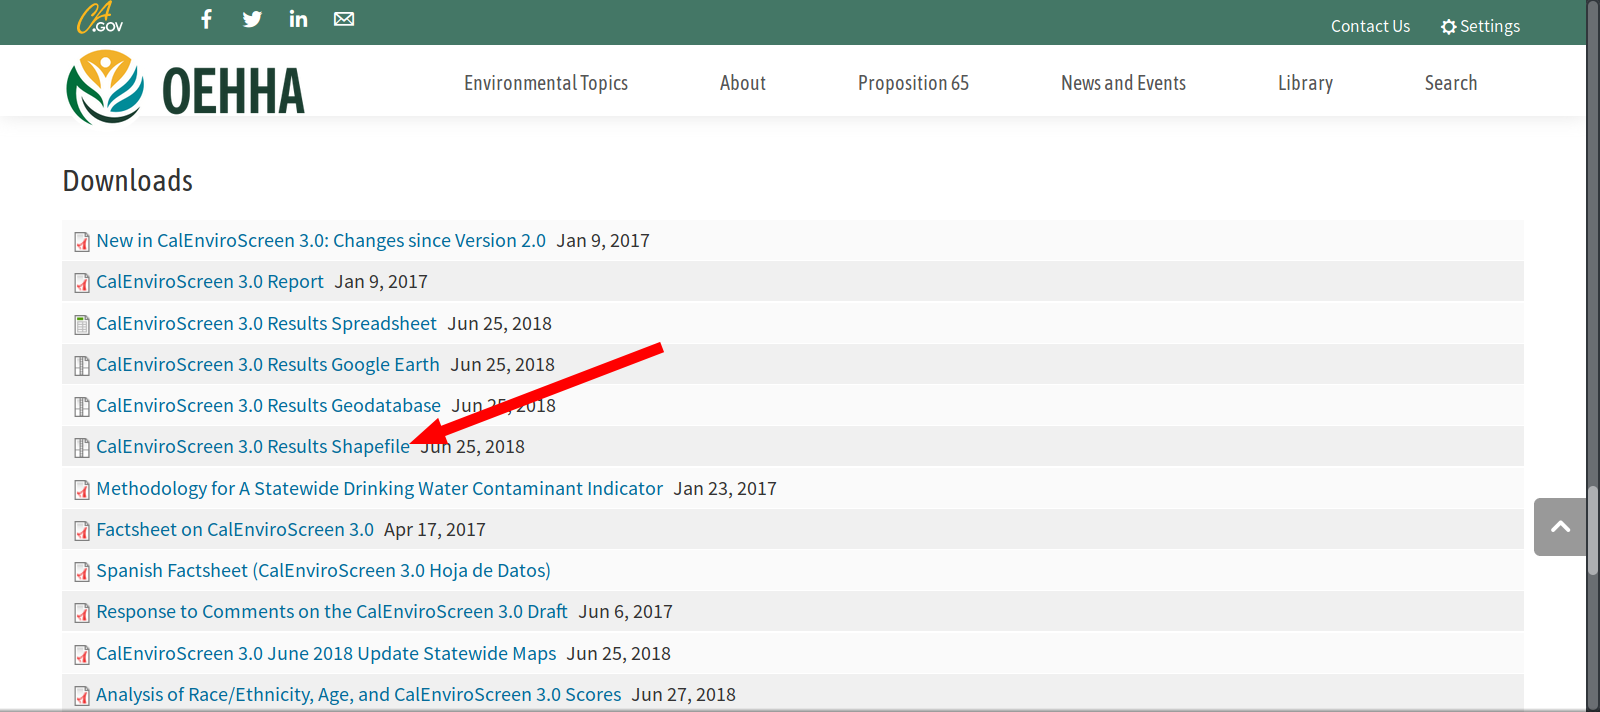

__Download__ and the __extract__ the shapefile.   

*Note*: A shapefile is composed of many files.

## Adding (shape) files to Jupyter Notebooks

For those running a Jupyter notebook on Azure, we can upload our files using two methods   

  1) By navigating back to the repository view and clicking __upload__:

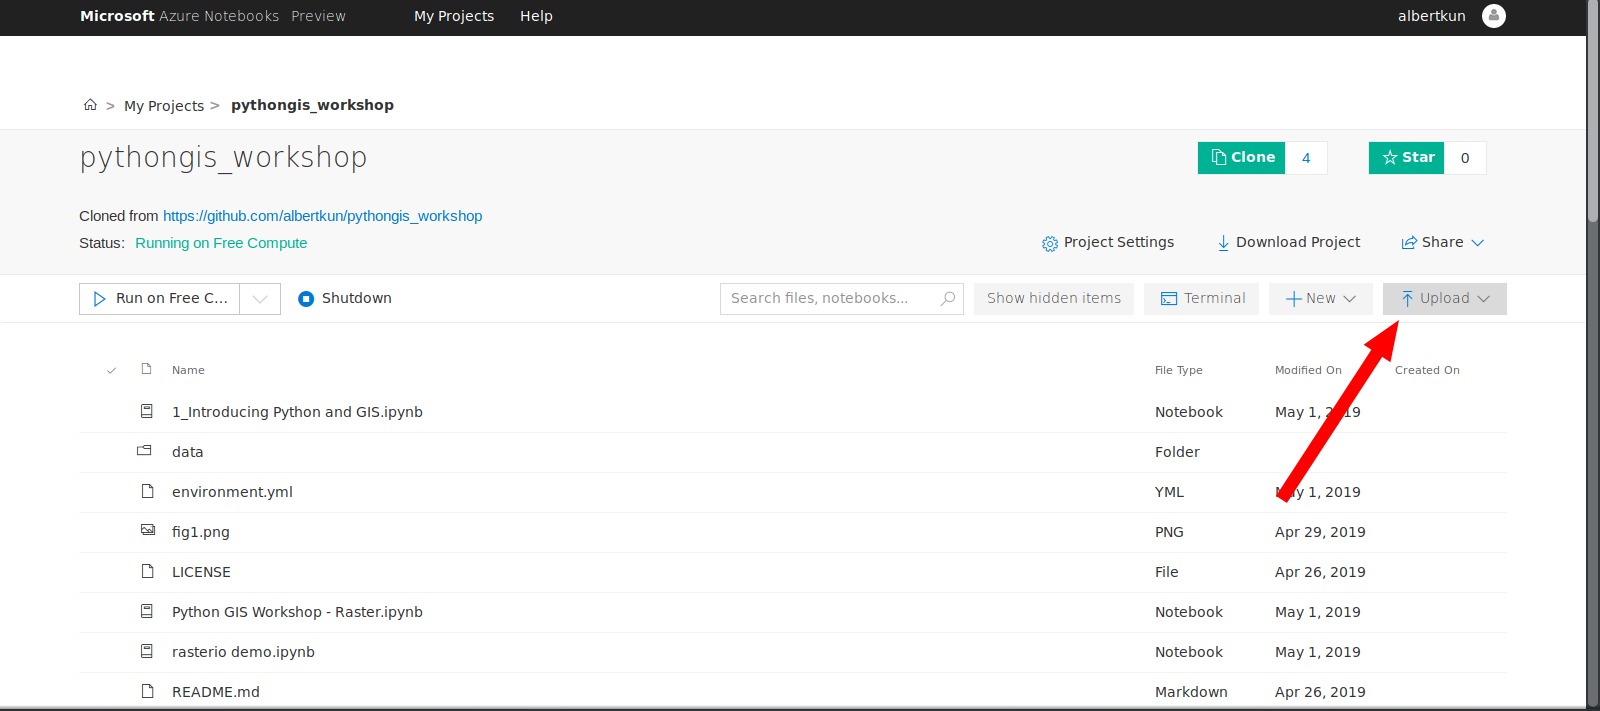

2) Using the Jupyter Notebook environment and clicking __Upload__:
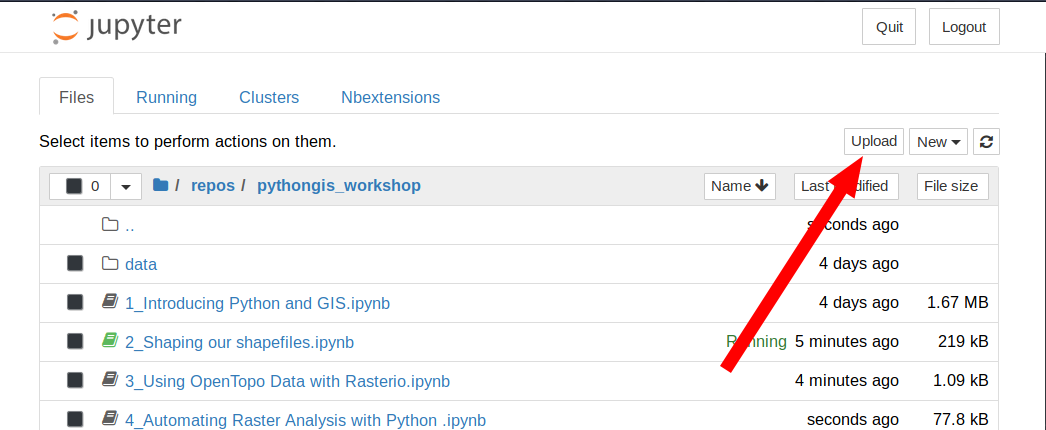

In both instances, upload the extracted data to the `shapefiles` folder within the `data` folder. 

If you are running vanilla Python, extract the files to a folder accessible relative to your script:    
   
   For example:   
   `my_python_script.py/data/shapefiles`

## Modifying data with GeoPandas

Load the shapefile with `geopandas` and interrogate the data by using the `head()` function. 

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gp.GeoDataFrame.from_file("./data/shapefiles/CES3June2018Update.shp")
print(gdf.head())

# do you remember the command to show the map?
# something something plot()


### Calculating Population Density

To come up with priority areas for environmental justice, this EDA analysis will combine these variables into an index:   
   - __Low Population Density__
   - Low income
   - High rates of pollution

Population density can be defined as the __number of people__ over __total area__ and is useful for normalizing data to see where populations of people are concentrated.   

$p= \dfrac{m} {v}$  

Let's add a density column and populate to analyze EDAs in California.

The process of adding a new column with geopandas is like adding one in a Python dictionary or pandas, by defining it:    

`some_data_dictionary['hello_new_column']`

The following definition will create the population density column:

`gdf['pop_density']`


We also want to be sure to select out places with no people, since that has no population at all:

#### Selecting data from a field:

In [ ]:
places_w_people = gdf[gdf['pop2010'] > 0]
# print out our data
print("{} rows have population out of {} ".format(len(places_w_people),len(gdf)))

But with Python, defining the column data can occur at the same time as the population density calculation.


#### Population Density Calculation:

In [ ]:
gdf['pop_density'] = places_w_people['pop2010'] / gdf['Shape_Area']

print(gdf['pop_density'])

Finally, we will `bin` (or `categorize`) our data, which is required to index our data with other variables. To do so, we will need to use __`pandas`__.

In [ ]:
import pandas as pd
gdf['density_qcut'] = pd.qcut(gdf['pop_density'],5, labels=[5,4,3,2,1.0])
# print(pd.to_numeric(gdf['density_qcut'],downcast='integer'))
print(gdf['density_qcut'].head())
# print("{} rows have been categorized".format(len(gdf[gdf['density_qcut'].notnull()])))

### Automating Low Income and Pollution Categorizing

Now that we have our population density categorized, we will do the same for:  
   - Low Population Density
   - __Low income__
   - __High rates of pollution__

Because the poverty data and pollution data is already calculated, we can automate the process by creating a function for the next two columns.   

We will start by creating an array of the columns we want to use:

In [ ]:
analysis = ['pov','Pollution']

Next we will define the function:

In [ ]:
def categorizer(column):
    new_column_name = column+"_qcut"
    gdf[new_column_name] = pd.qcut(gdf[column],5,labels=False)+1
    print("New column '{}' created for categorizing '{}'.".format(new_column_name,column))

Next we will loop through our array and categorize both of them!

In [ ]:
analysis = ['pov','Pollution']
for variable in analysis:
    categorizer(variable)

In [ ]:
gdf['pov_qcut'] = pd.qcut(gdf['pov'],5, labels=False)+1
gdf['pollution_qcut'] = pd.qcut(gdf['Pollution'],5, labels=False)+1

# print(gdf['pov_qcut'])
print("{} rows have been categorized".format(len(gdf[gdf['pov_qcut'].notnull()])))

## Creating a EDA Index

With our variables categorized into:   
    -  'density_qcut'  
    -  'pov_qcut'   
    -  'pollution_qcut'   
    
We can combine them into an __index__ with equal weights.

-Explain the weights a little more here-

In [ ]:
# calculate our index by multiplying values and adding them up
gdf['EDA_index'] = (pd.to_numeric(gdf['density_qcut'])*.33) + (gdf['pov_qcut']*.33)+(gdf['pollution_qcut']*.33)

# show some data
print(gdf['EDA_index'].head())

# map our plot
gdf.plot(column='EDA_index')

eda = gdf

Let's add a legend:

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,figsize=(15, 15))

fig.suptitle('Economically Distressed Areas in California')

# we can also specify a column to make our map into a choropleth
eda.plot(ax=ax,column='EDA_index',legend=True,cmap='Reds')

Looks great! Except those smaller parts are hard to see. If only we can zoom in! That's where the next section with Folium comes in! However, before leaving we need to save out our shapefile!

## Saving out the shapefile

The command to save out a shapefile from a geodata frame is    
```Python
gdf.to_file("NAME_OF_SHAPEFILE")```

However, we do not need to create a shapefile with all the same data, just our new data, so we will use the ```gdf.loc[:,['FIELD_NAME1','FIELD_NAME2','ETC_']]``` command to create a shapefile with just our data.

In [ ]:
gdf.loc[:,['EDA_index','geometry']].to_file("./data/shapefiles/CA_EDA_analysis.shp")

You can specify other file types, using the `driver` parameter and specifying one of the drivers below:

import fiona
fiona.supported_drivers

In [ ]:
# example creating a geojson
gdf.loc[:,['EDA_index','geometry']].to_file("./data/shapefiles/CA_EDA_analysis.json" driver="GeoJSON")